In [1]:
# подключение необходимых зависимостей

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Markdown
print = lambda x: display(Markdown(x))

# Лабораторная работа №1
## Численные методы одномерной безусловной оптимизации. Методы дихотомии, золотого сечения, Фибоначчи.
### Выполнил студент группы ИДБ-18-09 Полс А.Д.

### Цель работы
Изучение методов безусловной одномерной оптимизации, применение их на практическом примере.Сравнить различные алгоритмы по эффективности на тестовых примерах.
### Порядок выполнения работы
1. Найти аналитическое решение задачи: $ min_{x \in \left [ a, b \right ] } f(x)$
2. Исследовать их сходимость и провести сравнение по числу вычисленийфункции для достижения заданной точности


### Вариант №19

Целевая функция: $ f(x) = x + \frac{2}{x}$ 

In [2]:
def f(x: float) -> float:
    return x + 2 / x

Начальный интервал неопределённости: $ X_{init} = \left [ a, b  \right ] = \left [ 1, 2 \right ]$ 

In [3]:
a, b = initial_approximation = [1, 2]

Точность $ \varepsilon = 0.05 $

In [4]:
accuracy = 0.05

## Аналитическое решение:
Необходимое условие существования экстремума функции в точке $x_0$: $\frac{\mathrm{d} }{\mathrm{d} x} f(x_0) = 0$

Достаточное условие экстремума функции в точке $x_0$: 
$
\left\{\begin{matrix}
\frac{\mathrm{d} }{\mathrm{d} x} f(x_0) = 0 \\ 
\frac{\mathrm{d^2} }{\mathrm{d} x^2} f(x_0) = a \ne 0 &
\left[\begin{matrix}
a > 0 & x_0 \leftarrow local \ min \\ 
a < 0 & x_0 \leftarrow local \ max
\end{matrix}\right.
\end{matrix}\right.
$


Аналитическое решение для целевой функции:

Найдём первую производную целевой функции:
$ \frac{\mathrm{d} }{\mathrm{d} x} f(x) 
= \frac{\mathrm{d} }{\mathrm{d} x} (x + \frac{2}{x}) 
=\frac{\mathrm{d} }{\mathrm{d} x} (x) + \frac{\mathrm{d} }{\mathrm{d} x} (\frac{2}{x})
=1 - \frac{2}{x^2}$

Решим уравнение: $ \frac{\mathrm{d} }{\mathrm{d} x} f(x) = 0 $

$ 1 - \frac{2}{x^2} = 0 \\ x = \pm \sqrt{2} \cong \pm 1.41421$

На начальном интервале неопределённости существует экстремум в точке $ \sqrt{2} \cong  1.41421 \in \left [ 1, 2 \right ] $

Найдём вторую производную целевой функции:
$ \frac{\mathrm{d}^2 }{\mathrm{d} x^2} f(x)
= \frac{\mathrm{d} }{\mathrm{d} x} (1 - \frac{2}{x^2})
= \frac{\mathrm{d} }{\mathrm{d} x} (1) - \frac{\mathrm{d} }{\mathrm{d} x}(\frac{2}{x^2})
= 0 - (- \frac{4}{x^3})
= \frac{4}{x^3}
$

Определим знак второй производной целевой функции в точке $x_0 = \sqrt{2} \cong 1.41421$

$ \frac{\mathrm{d}^2 }{\mathrm{d} x^2} f(x_0)
= \frac{\mathrm{d}^2 }{\mathrm{d} x^2} f(\sqrt{2})
= \frac{4}{\sqrt{2}^3}
= 2 > 0
$

Вторая производная целевой функции больше нуля. Из этого делаем вывод, что функция $ f(x) = x + \frac{2}{x}$ в точке $x_0 = \sqrt{2} \cong 1.41421 \in \left [ 1, 2 \right ]$ достигает своего локального минимума.

In [5]:
# значение точного решения
x_exact = np.sqrt(2)

In [6]:
def build_plot(xlim, ylim, ticks, small_ticks):
    
    x_min, x_max = xlim
    y_min, y_max = ylim
    x_tick, y_tick = ticks
    x_small_tick, y_small_tick = small_ticks
    
    fig, ax = plt.subplots(figsize=[13, 5]) 
    
    # вычисляем x и y
    xs_raw = np.linspace(x_min, x_max, 30_000)
    xs = np.ma.masked_where(abs(xs_raw) <= 0.001, xs_raw) # отключаем вычисления для x -> 0, т.к. f(x1) -> oo при x1-> 0
    ys = f(xs)
    
    #
    ax.plot(xs, ys, label=r'$f(x)=x+\frac{2}{x}$', color='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # устанавливаем сетку
    major_xticks = np.arange(x_min, x_max, x_tick)
    minor_xticks = np.arange(x_min, x_max, x_small_tick)
    major_yticks = np.arange(y_min, y_max, y_tick)
    minor_yticks = np.arange(y_min, y_max, y_small_tick)

    ax.set_xticks(major_xticks)
    ax.set_xticks(minor_xticks, minor=True)
    ax.set_yticks(major_yticks)
    ax.set_yticks(minor_yticks, minor=True)

    ax.grid(which='both')
    
    
    # устанавливаем название графика
    ax.set_title(f'График функции $f(x)$ на интервале $[{x_min}, {x_max}]$')
    
    return ax

#### Построим график функции

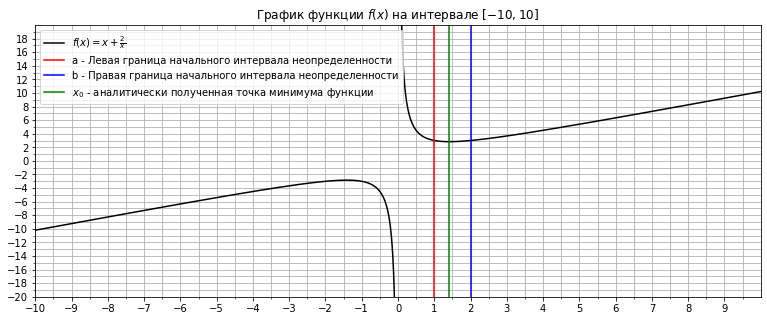

In [7]:
ax = build_plot(xlim=(-10, 10),
                ylim=(-20, 20),
                ticks=(1, 2), 
                small_ticks=(0.5, 1))

ax.axvline(a, color='red', label='a - Левая граница начального интервала неопределенности')
ax.axvline(b, color='blue', label='b - Правая граница начального интервала неопределенности')
ax.axvline(x_exact, color='green', label='$x_0$ - аналитически полученная точка минимума функции')

ax.legend();

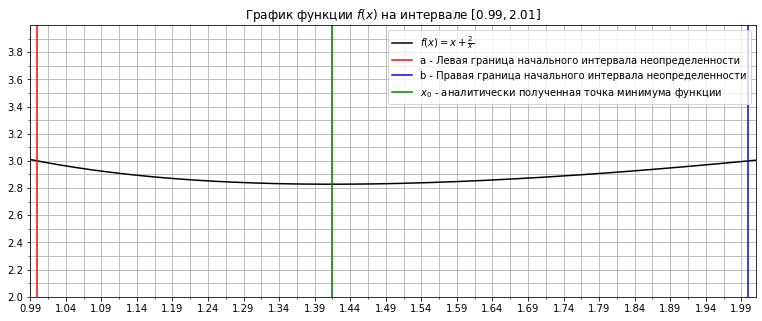

In [8]:
ax = build_plot(xlim=(a-0.01, b+0.01),
                ylim=(2, 4),
                ticks=(0.05, 0.2), 
                small_ticks=(0.025, 0.1))

ax.axvline(a, color='red', label='a - Левая граница начального интервала неопределенности')
ax.axvline(b, color='blue', label='b - Правая граница начального интервала неопределенности')
ax.axvline(x_exact, color='green', label='$x_0$ - аналитически полученная точка минимума функции')

ax.legend();

## Метод дихотомии:

In [9]:
def dichotomy_method(function, initial_approximation, accuracy, offset=0.01):
    a, b = initial_approximation
    iterations_amount = 0
    
    
    while accuracy < abs(b - a):
        y = (a + b - offset) / 2 
        z = (a + b + offset) / 2
        
        if function(y) <= function(z):
            b = z
        else:
            a = y
            
        iterations_amount += 2
            
    return a, b, iterations_amount

## Решение методом дихотомии:
Конечный интервал: $x_{dichotomy} \in (1.40219; 1.44312)$
Приближенное решение: $x^*=\frac{1.40219+1.44312}{2}=1.42265625$ было найдено за 10 вызовов функций

Сходимость метода за $10$ вычислений функций: $0.03125$

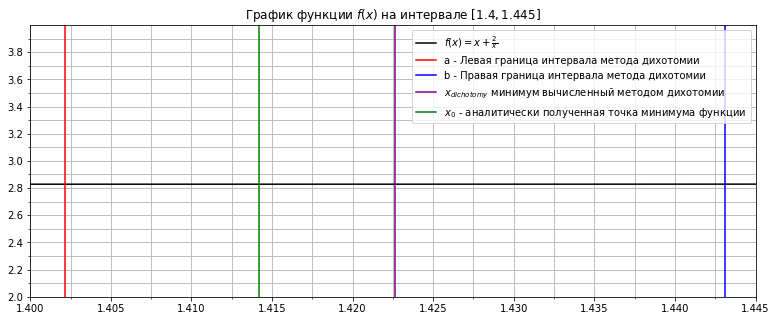

In [10]:
left_bound, right_bound, it_amount = dichotomy_method(f, initial_approximation, accuracy)

dichotomy_solution = (left_bound + right_bound) /2

dichotomy_convergence = lambda x: 1 / 2 ** (x/2) 

print(f"## Решение методом дихотомии:\nКонечный интервал: $x_{{dichotomy}} \in ({round(left_bound, 5)}; {round(right_bound, 5)})$\nПриближенное решение: $x^*=\\frac{{{round(left_bound, 5)}+{round(right_bound, 5)}}}{{{2}}}={dichotomy_solution}$ было найдено за {it_amount} вызовов функций")
print(f"Сходимость метода за ${it_amount}$ вычислений функций: ${dichotomy_convergence(it_amount)}$")

ax = build_plot(xlim=(1.4, 1.445),
                ylim=(2, 4),
                ticks=(0.005, 0.2), 
                small_ticks=(0.0025, 0.1))

ax.axvline(left_bound, color='red', label='a - Левая граница интервала метода дихотомии')
ax.axvline(right_bound, color='blue', label='b - Правая граница интервала метода дихотомии')
ax.axvline(dichotomy_solution, color='purple', label='$x_{dichotomy}$ минимум вычисленный методом дихотомии')
ax.axvline(x_exact, color='green', label='$x_0$ - аналитически полученная точка минимума функции')

ax.legend();

## Метод золотого сечения:

In [11]:
def golden_ration(function, initial_approximation, epsilon):
    a, b = initial_approximation
    iterations_amount = 1
    golden_ratio =  (3 - np.sqrt(5)) / 2
    
    delta = abs(b - a)
    
    y = a + golden_ratio * (b - a)
    z = a + b - y
    
    fy = function(y)
    fz = function(z)
    
    while abs(b - a) > epsilon:
        if fy <= fz:
            b = z
            z = y
            fz = fy
            
            y = a + b - y
            fy = function(y)
        else: 
            a = y
            y = z
            fy = fz
            
            z = a + b - z
            fz = function(z)
        
        iterations_amount += 1
    

    return a, b, iterations_amount

## Решение методом золотого сечения:
Конечный интервал: $x_{golden} \in (1.40325; 1.43769)$
Приближенное решение: $x^*=\frac{1.40325+1.43769}{2}=1.420473174376629$ было найдено за 8 шагов

Сходимость метода за $8$ вычислений функций: $0.03443$

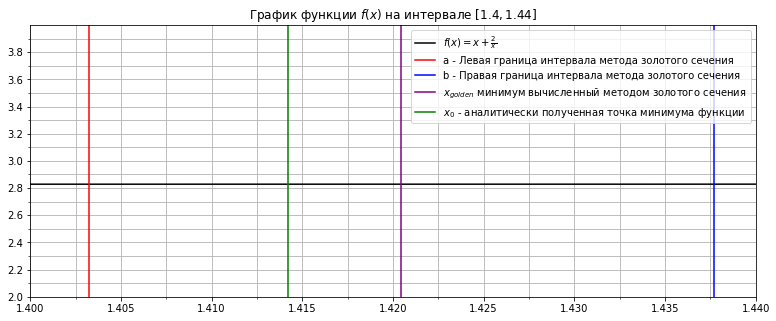

In [12]:
left_bound, right_bound, it_amount = golden_ration(f, initial_approximation, accuracy)

golden_solution = (left_bound + right_bound) / 2

golden_convergence = lambda x: 0.618 ** (x - 1)

print(f"## Решение методом золотого сечения:\nКонечный интервал: $x_{{golden}} \in ({round(left_bound, 5)}; {round(right_bound, 5)})$\nПриближенное решение: $x^*=\\frac{{{round(left_bound, 5)}+{round(right_bound, 5)}}}{{{2}}}={golden_solution}$ было найдено за {it_amount} шагов")
print(f"Сходимость метода за ${it_amount}$ вычислений функций: ${round(golden_convergence(it_amount), 5)}$")

ax = build_plot(xlim=(1.4, 1.44),
                ylim=(2, 4),
                ticks=(0.005, 0.2), 
                small_ticks=(0.0025, 0.1))

ax.axvline(left_bound, color='red', label='a - Левая граница интервала метода золотого сечения')
ax.axvline(right_bound, color='blue', label='b - Правая граница интервала метода золотого сечения')
ax.axvline(golden_solution, color='purple', label='$x_{golden}$ минимум вычисленный методом золотого сечения')
ax.axvline(x_exact, color='green', label='$x_0$ - аналитически полученная точка минимума функции')

ax.legend();

## Метод фибоначчи

In [13]:
def fibonacci(function, initial_approximation, epsilon, constant=0.025):
    a = [initial_approximation[0]]
    b = [initial_approximation[1]]

    iterations_amount = 1
    fibonacci_values = [1, 1]

    while fibonacci_values[-1] <= abs(b[-1] - a[-1]) / epsilon:
        fibonacci_values.append(fibonacci_values[-1] + fibonacci_values[-2])

    n = len(fibonacci_values) - 1

    Lambda = [a[-1] + fibonacci_values[n - iterations_amount - 1] * (b[-1] - a[-1]) / fibonacci_values[n - iterations_amount + 1]]
    Mu = a[-1] + fibonacci_values[n - iterations_amount] * (b[-1] - a[-1]) / fibonacci_values[n - iterations_amount + 1]

    f_of_Lambda = function(Lambda[-1])
    f_of_Mu = function(Mu)
    function_calls_amount = 2

    while iterations_amount != n - 2:
        if f_of_Lambda > f_of_Mu:
            a.append(Lambda[iterations_amount - 1])
            Lambda.append(Mu)
            Mu = a[-1] + fibonacci_values[n - iterations_amount - 1] * (b[-1] - a[-1]) / fibonacci_values[n - iterations_amount]
            f_of_Mu = function(Mu)
        else:
            b.append(Mu)
            Mu = Lambda[-1]
            Lambda.append(a[-1] + fibonacci_values[n - iterations_amount - 2] * (b[-1] - a[-1]) / fibonacci_values[n - iterations_amount])
            f_of_Lambda = function(Lambda[-1])

        iterations_amount += 1
        function_calls_amount += 1

    Mu = Lambda[-2] + constant
    f_of_Lambda = function(Lambda[-2])
    f_of_Mu = function(Mu)
    function_calls_amount += 2

    if f_of_Lambda < f_of_Mu:
        a[-1] = a[-2]
        b[-1] = Lambda[-2]
    else:
        a[-1] = Lambda[-2]
        b[-1] = b[-2]


    return a[-1], b[-1], function_calls_amount

## Решение методом золотого сечения:
Конечный интервал: $x_{fib} \in (1.2381; 1.61905)$
Приближенное решение: $x^*=\frac{1.2381+1.61905}{2}=1.420473174376629$ было найдено за 8 вызовов функций

Сходимость метода за $8$ вычислений функций: $0.04762$

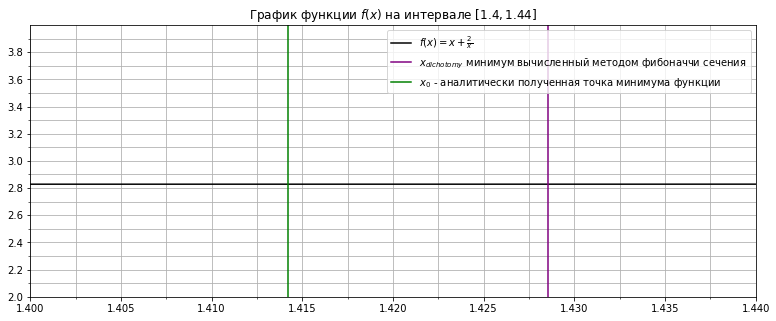

In [14]:
left_bound, right_bound, it_amount = fibonacci(f, initial_approximation, accuracy)

fibonacci_solution = (left_bound + right_bound) / 2

def fib(x):
    return 1 if (x <= 2) else fib(x-1) + fib(x-2)

fibonacci_convergence = lambda x: 1 / fib(x)

print(f"## Решение методом золотого сечения:\nКонечный интервал: $x_{{fib}} \in ({round(left_bound, 5)}; {round(right_bound, 5)})$\nПриближенное решение: $x^*=\\frac{{{round(left_bound, 5)}+{round(right_bound, 5)}}}{{{2}}}={golden_solution}$ было найдено за {it_amount} вызовов функций")
print(f"Сходимость метода за ${it_amount}$ вычислений функций: ${round(fibonacci_convergence(it_amount), 5)}$")

ax = build_plot(xlim=(1.4, 1.44),
                ylim=(2, 4),
                ticks=(0.005, 0.2), 
                small_ticks=(0.0025, 0.1))

ax.axvline(fibonacci_solution, color='purple', label='$x_{dichotomy}$ минимум вычисленный методом фибоначчи сечения')
ax.axvline(x_exact, color='green', label='$x_0$ - аналитически полученная точка минимума функции')

ax.legend();

## Решения:

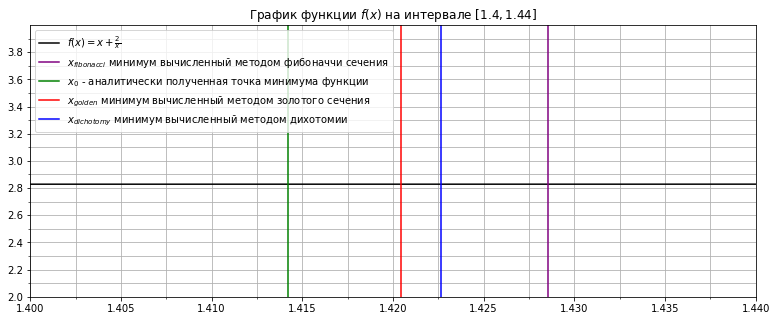

In [15]:
ax = build_plot(xlim=(1.4, 1.44),
                ylim=(2, 4),
                ticks=(0.005, 0.2), 
                small_ticks=(0.0025, 0.1))

ax.axvline(fibonacci_solution, color='purple', label='$x_{fibonacci}$ минимум вычисленный методом фибоначчи сечения')
ax.axvline(x_exact, color='green', label='$x_0$ - аналитически полученная точка минимума функции')
ax.axvline(golden_solution, color='red', label='$x_{golden}$ минимум вычисленный методом золотого сечения')
ax.axvline(dichotomy_solution, color='blue', label='$x_{dichotomy}$ минимум вычисленный методом дихотомии')
ax.legend();

print('## Решения:')

# Вывод:

1. Для целевой функции количество вычислений функции:
    - Для метода дихотомии: 10
    - Для метода золотого сечения: 8
    - Для метода фибоначчи: 8
2. Для целевой функции следующие скорости сходимости:
    - Для метода дихотомии: 0.03125 - самое быстрое схождение
    - Для метода золотого сечения: 0.03443
    - Для метода фибоначчи: 0.04762 - самое медленное схождение
   